In [16]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


from matplotlib import style
style.use('fivethirtyeight')


df=pd.read_csv('Google.csv')
df['Date'] = df['Date'].astype('datetime64[ns]')
df.set_index('Date',inplace=True)
df['High_Low_Change']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100.0
df['Change_Perc']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0
    
df=df[['Adj. Close','High_Low_Change','Change_Perc','Adj. Volume']]
df.fillna(-9999,inplace=True)
    
  
#Label
df['Price_After_Month']=df['Adj. Close'].shift(-30)

#Features
X=np.array(df.drop(['Price_After_Month'],1))
X=preprocessing.scale(X)
X=X[:-30]
X_Check=X[-30:]
    
df.dropna(inplace=True)
y=np.array(df['Price_After_Month'])
    
#Splitting the data set for training and testin
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3
                                                    random_state=23)

In [32]:
df.head()

,Adj. Close,High_Low_Change,Change_Perc,Adj. Volume,Price_After_Month
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,66.495265
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.739104
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,69.399229
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,68.752232
2004-08-25,53.164113,1.886792,1.183658,9188600.0,69.639972


In [20]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [30]:

class LinearRegressionscratch:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias


In [24]:
model = LinearRegressionscratch()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [34]:
preds

array([326.86893852, 161.79133061, 212.58826192, 314.7659606 ,
       538.38964074, 255.9237626 ,  62.22736856, 454.11843139,
       226.03324255, 271.40811456,  95.21486921, 282.19160447,
       106.07516556, 558.85505387, 314.27163572, 713.72859527,
       216.0777868 , 714.29376035, 143.71188286, 662.07928354,
       252.22168002, 395.79137312, 248.13701815, 738.58695107,
       513.07468472, 227.11560924, 380.15693481, 258.99616841,
       546.87075136,  96.25662167, 729.61106206, 333.8741764 ,
       278.44182142, 217.75416659, 765.14031683, 523.41480401,
       296.01225958, 242.91055989, 370.48708697, 812.98571188,
        97.63223717, 145.89349533, 522.0694949 , 185.78513802,
       609.88026855, 627.27543365, 774.26688793, 320.65827227,
       280.39814027, 763.9223758 , 244.84381308, 176.4348569 ,
       736.55978813, 351.26971752, 244.69815698, 202.39130638,
       244.07363606, 764.92455748, 312.97647497, 590.90836768,
       569.4755843 , 289.75849246, 551.16464678, 443.99

In [35]:
model.bias

361.35830445499255

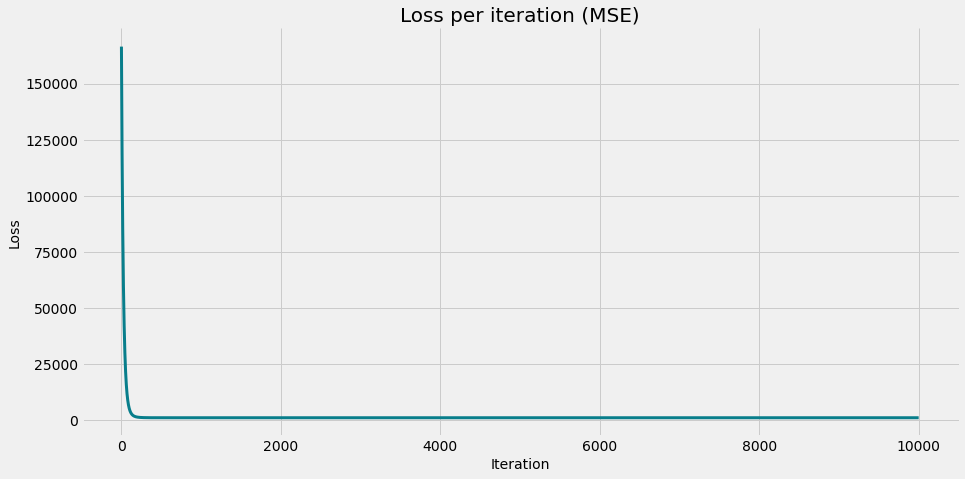

In [26]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

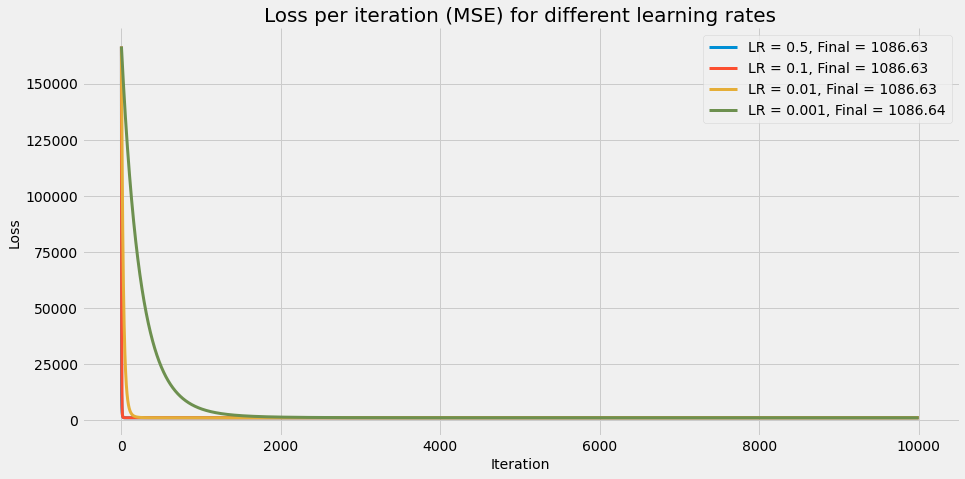

In [27]:
losses = {}
for lr in [0.5, 0.1, 0.01, 0.001]:
    model = LinearRegression(learning_rate=lr)
    model.fit(X_train, y_train)
    losses[f'LR={str(lr)}'] = model.loss
    
    
xs = np.arange(len(model.loss))

plt.plot(xs, losses['LR=0.5'], lw=3, label=f"LR = 0.5, Final = {losses['LR=0.5'][-1]:.2f}")
plt.plot(xs, losses['LR=0.1'], lw=3, label=f"LR = 0.1, Final = {losses['LR=0.1'][-1]:.2f}")
plt.plot(xs, losses['LR=0.01'], lw=3, label=f"LR = 0.01, Final = {losses['LR=0.01'][-1]:.2f}")
plt.plot(xs, losses['LR=0.001'], lw=3, label=f"LR = 0.001, Final = {losses['LR=0.001'][-1]:.2f}")
plt.title('Loss per iteration (MSE) for different learning rates', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.show()

In [31]:
model = LinearRegressionscratch(learning_rate=0.5)
model.fit(X_train, y_train)
preds = model.predict(X_test)

model._mean_squared_error(y_test, preds)

1159.5881408531734

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

mean_squared_error(y_test, lr_preds)

1159.5881408531743